<a href="https://colab.research.google.com/github/adityahogade/Placement-data-analysis-/blob/main/placementdataanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dataset2=pd.read_csv("/content/sample_data/Sample.csv")
print(dataset2)

                             Email                Name  Gender   10th board  \
0            payal_roy79@gmail.com           Payal Roy  Female  State Board   
1        shreyoshi_dey13@gmail.com       Shreyoshi Dey  Female        WBBSE   
2          rohan_nandi12@gmail.com         Rohan Nandi    Male  State Board   
3        smita_agarwal90@gmail.com       Smita Agarwal  Female         CBSE   
4    samaira_singhania95@gmail.com   Samaira Singhania  Female         ICSE   
..                             ...                 ...     ...          ...   
396     mandira_kapoor63@gmail.com      Mandira Kapoor  Female         ICSE   
397        smita_yadav92@gmail.com         Smita Yadav  Female  State Board   
398       manish_sinha90@gmail.com        Manish Sinha    Male         CBSE   
399          pawan_sah12@gmail.com           Pawan Sah    Male         ICSE   
400  abhijit_chatterjee6@gmail.com  Abhijit Chatterjee    Male        WBBSE   

     10th marks         12th board  12th marks  \
0

In [ ]:
dataset2.shape

(401, 16)

In [ ]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Email                    401 non-null    object 
 1   Name                     401 non-null    object 
 2   Gender                   401 non-null    object 
 3   10th board               401 non-null    object 
 4   10th marks               401 non-null    float64
 5   12th board               401 non-null    object 
 6   12th marks               401 non-null    float64
 7   Stream                   401 non-null    object 
 8   Cgpa                     401 non-null    float64
 9   Internships(Y/N)         401 non-null    object 
 10  Training(Y/N)            401 non-null    object 
 11  Backlog in 5th sem       401 non-null    object 
 12  Innovative Project(Y/N)  401 non-null    object 
 13  Communication level      401 non-null    int64  
 14  Technical Course(Y/N)    4

In [ ]:
dataset=dataset2.loc[(dataset2['Stream'] != 'IMsc Maths and Computing' ) & (dataset2['Stream']!= 'Chemical Engineering')&(dataset2['Stream']!= 'Electrical Engineering')]

In [ ]:
dataset.drop(['Email'],axis=1,inplace=True)
#remove unused columns from dataset axis=full row

<ipython-input-11-7a9cbe71549f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(['Email'],axis=1,inplace=True)


In [ ]:
pd.isnull(dataset).sum()
#count null values

,0
Name,0
Gender,0
10th board,0
10th marks,0
12th board,0
12th marks,0
Stream,0
Cgpa,0
Internships(Y/N),0
Training(Y/N),0


In [ ]:
# Basic statistics
print(dataset.describe())

       10th marks  12th marks        Cgpa  Communication level
count  344.000000  344.000000  344.000000           344.000000
mean    84.504651   78.480610    8.501424             2.930233
std      9.651724   10.371142    4.475749             1.368455
min     32.000000   45.000000    5.500000             1.000000
25%     77.600000   69.875000    7.607500             2.000000
50%     85.200000   79.950000    8.300000             3.000000
75%     91.925000   87.200000    8.940000             4.000000
max    100.000000   97.000000   90.000000             5.000000


In [ ]:
print(dataset.dtypes)

Name                        object
Gender                      object
10th board                  object
10th marks                 float64
12th board                  object
12th marks                 float64
Stream                      object
Cgpa                       float64
Internships(Y/N)            object
Training(Y/N)               object
Backlog in 5th sem          object
Innovative Project(Y/N)     object
Communication level          int64
Technical Course(Y/N)       object
Placement(Y/N)?             object
dtype: object


In [ ]:
dataset["Placement(Y/N)?"] = dataset["Placement(Y/N)?"].replace({"Placed": 1, "Not Placed": 0})
dataset['Training(Y/N)'] = dataset['Training(Y/N)'].replace({'Yes': 1, 'No': 0})
dataset['Internships(Y/N)'] = dataset['Internships(Y/N)'].replace({'Yes': 1, 'No': 0})
print(dataset)

                   Name  Gender   10th board  10th marks         12th board  \
0             Payal Roy  Female  State Board        96.7               CBSE   
1         Shreyoshi Dey  Female        WBBSE        96.2             WBCHSE   
2           Rohan Nandi    Male  State Board        97.5               CBSE   
3         Smita Agarwal  Female         CBSE        96.9  Other state Board   
4     Samaira Singhania  Female         ICSE        99.1               CBSE   
..                  ...     ...          ...         ...                ...   
395          Adarsh Das    Male  State Board        97.8                ISE   
396      Mandira Kapoor  Female         ICSE        88.8               CBSE   
397         Smita Yadav  Female  State Board        86.7               CBSE   
399           Pawan Sah    Male         ICSE        99.8                ISE   
400  Abhijit Chatterjee    Male        WBBSE        94.2               CBSE   

     12th marks                                    

<ipython-input-15-8525649175eb>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset["Placement(Y/N)?"] = dataset["Placement(Y/N)?"].replace({"Placed": 1, "Not Placed": 0})
<ipython-input-15-8525649175eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Placement(Y/N)?"] = dataset["Placement(Y/N)?"].replace({"Placed": 1, "Not Placed": 0})
<ipython-input-15-8525649175eb>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, exp

In [ ]:
dataset[['Placement(Y/N)?','Training(Y/N)','Internships(Y/N)']].describe()

,Placement(Y/N)?,Training(Y/N),Internships(Y/N)
count,344.000000,344.000000,344.000000
mean,0.488372,0.537791,0.604651
std,0.500593,0.499296,0.489638
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


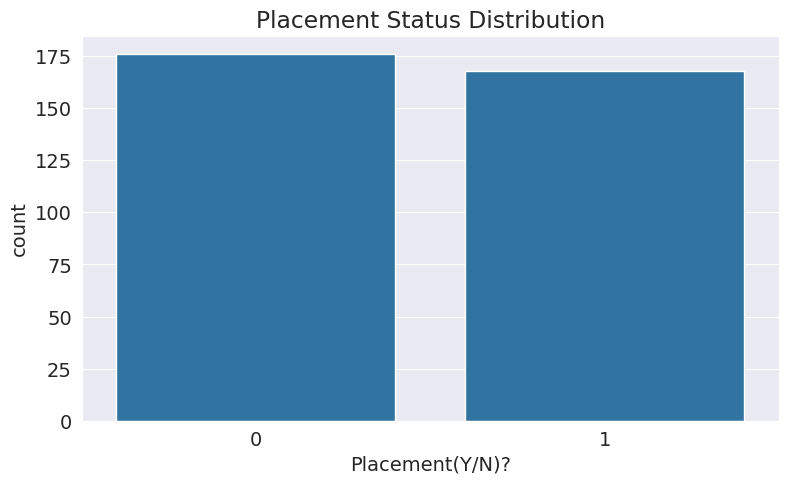

In [ ]:
sns.countplot(x='Placement(Y/N)?', data=dataset)
plt.title('Placement Status Distribution')
plt.show()

In [ ]:
selectedStu=result = dataset.loc[(dataset['Placement(Y/N)?'] == 1)]

print(selectedStu)

                        Name  Gender   10th board  10th marks  \
2                Rohan Nandi    Male  State Board        97.5   
7    Dharmik Chsuhan Chauhan    Male  State Board        79.4   
8                  Suman Sen    Male        WBBSE        88.0   
13                  Mita Pal  Female         CBSE        78.5   
15                  Amit Dey    Male        WBBSE        75.0   
..                       ...     ...          ...         ...   
387              UTPAL MAJEE    Male         CBSE        45.0   
388             Sankar Nayak    Male        WBBSE        70.0   
391            Tithi Goswami  Female         CBSE        74.8   
395               Adarsh Das    Male  State Board        97.8   
397              Smita Yadav  Female  State Board        86.7   

            12th board  12th marks                                     Stream  \
2                 CBSE        69.6                     Information Technology   
7              Diploma        82.1                     Pr

comparing with department


Let us view the distribution of students across all the departments.

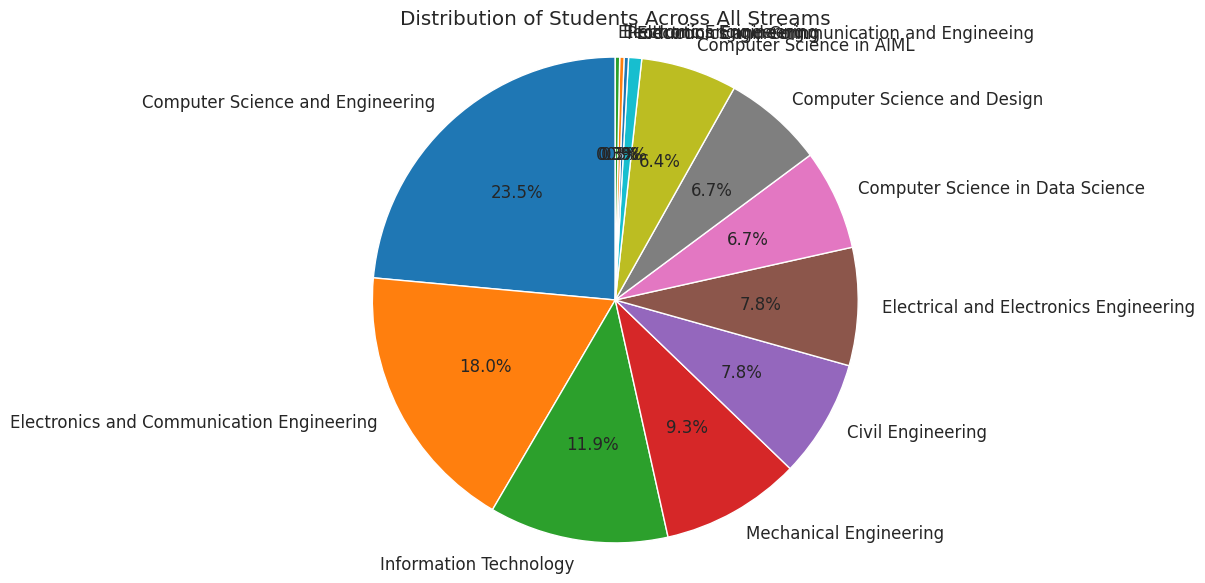

In [ ]:

sns.set_style('darkgrid')
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

stream_counts = dataset['Stream'].value_counts()


plt.figure(figsize=(12, 6))
plt.pie(stream_counts, labels=stream_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Students Across All Streams')
plt.axis('equal')
plt.show()


Following is the distribution of the number of internships undergone by the students.

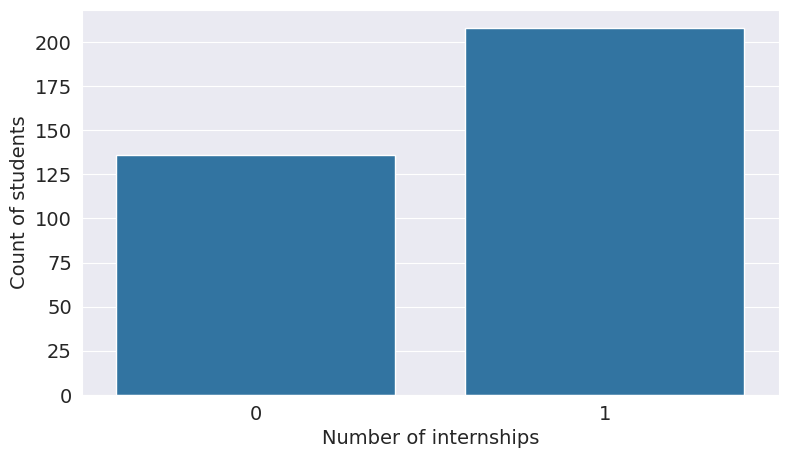

In [ ]:
ax = sns.countplot(x = 'Internships(Y/N)', data=dataset)
#for p in ax.patches:
 #  ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.style.use('default')
plt.xlabel('Number of internships')
plt.ylabel('Count of students')
plt.show()

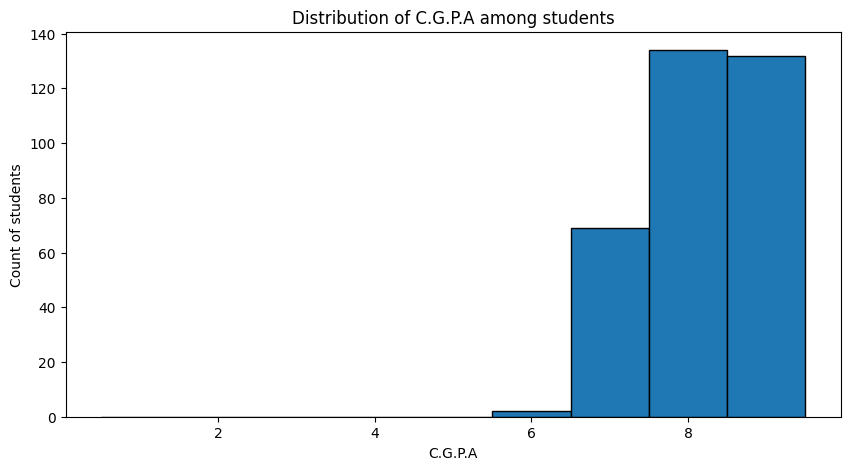

In [ ]:
# raw_df['CGPA'].plot(kind='hist')
fig, ax = plt.subplots(figsize=(10,5))
temp_data = dataset['Cgpa']
ax.hist(temp_data, bins = np.arange(0,10)+0.5, ec="k")
ax.locator_params(axis='x', integer=True)
plt.title('Distribution of C.G.P.A among students')
plt.xlabel('C.G.P.A')
plt.ylabel('Count of students')
plt.show()

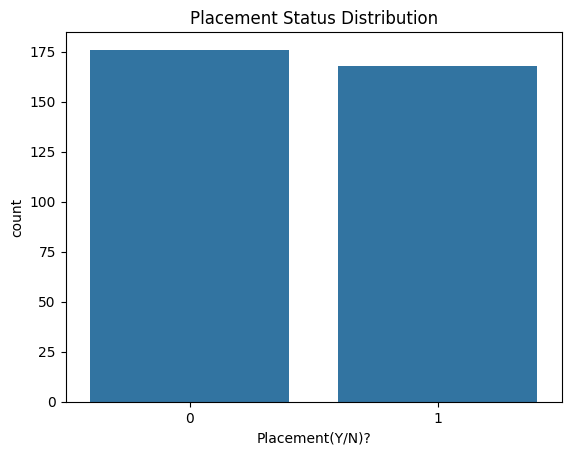

In [ ]:
sns.countplot(x='Placement(Y/N)?', data=dataset)
plt.title('Placement Status Distribution')
plt.show()

Text(0, 0.5, 'Count of students')

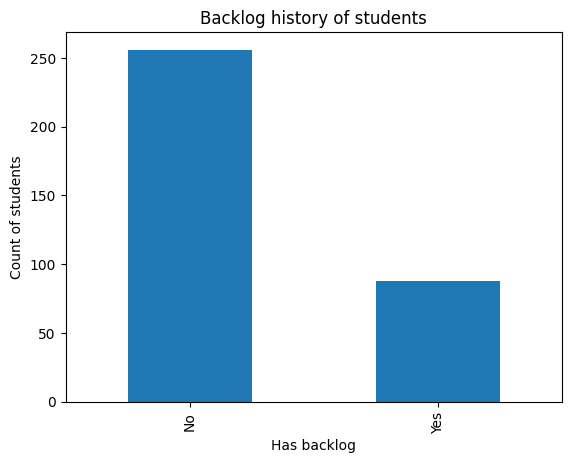

In [ ]:
dataset['Backlog in 5th sem'].value_counts()[:].plot(kind='bar')
plt.title('Backlog history of students')
plt.xlabel('Has backlog')
plt.ylabel('Count of students')

: What is the strength of students from various streams with different internship experiences?


<Figure size 1400x700 with 0 Axes>

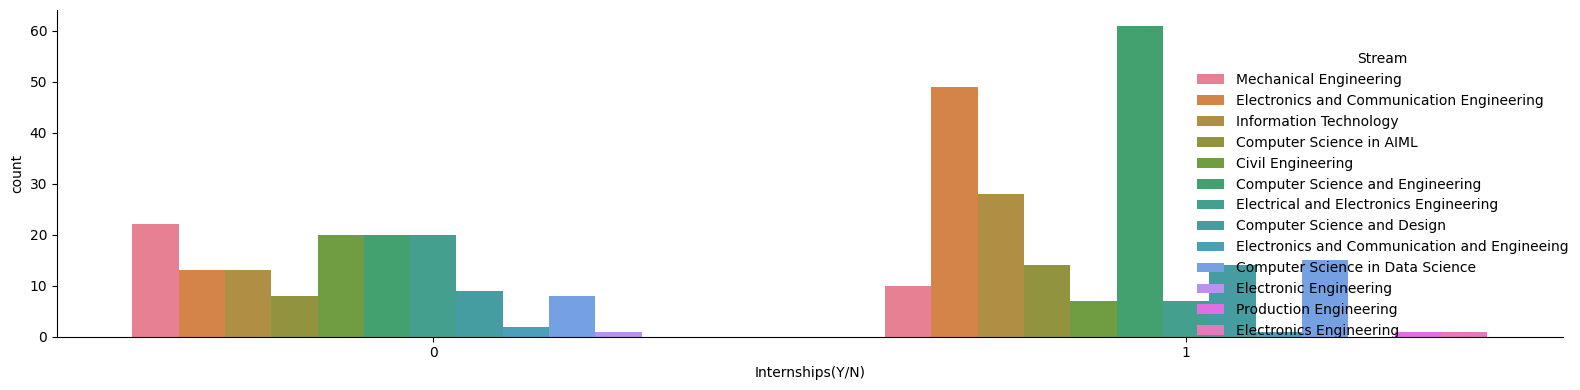

In [ ]:
#setting up visualisation.
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.figure(figsize=(14, 7))

#grouping data by "Stream".
total = dataset.groupby('Stream')['Placement(Y/N)?'].count().reset_index()

#getting data in percentages.
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

#plotting the graph
sns.catplot(x="Internships(Y/N)", hue="Stream", kind="count", data=dataset, height=4, aspect=3)
plt.show()